<a href="https://colab.research.google.com/github/tahminehladi/Brain_tumor_image_classification/blob/main/Brain_Tumor_MRI_25Dec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
masoudnickparvar_brain_tumor_mri_dataset_path = kagglehub.dataset_download('masoudnickparvar/brain-tumor-mri-dataset')

print('Data source import complete.')


100%|██████████| 149M/149M [00:01<00:00, 83.6MB/s]

Extracting files...


Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
# General Imports
import tensorflow as tf
import pandas as pd
import numpy as np
import random
import os

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Warnings
import warnings
warnings.filterwarnings("ignore")

# Building Model
from keras.utils import plot_model
from tensorflow.keras import models
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import legacy


# Training Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

# Model Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# Data Processing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.preprocessing.image import load_img

In [4]:
# Path to the 'Training' folder
base_path = os.path.join(masoudnickparvar_brain_tumor_mri_dataset_path, "Training")

# Supported image file extensions
image_extensions = (".png", ".jpg", ".jpeg")

# Dictionary to store image paths for each folder (category)
image_lists = {}

# List of folder names to process
folder_names = ["glioma", "meningioma", "notumor", "pituitary"]

# Iterate through the specified folders
for folder_name in folder_names:
    folder_path = os.path.join(base_path, folder_name)

    # Check if it's a directory
    if os.path.isdir(folder_path):
        # Initialize a list for this folder
        image_lists[folder_name] = []

        # Iterate through files in the folder
        for file_name in os.listdir(folder_path):
            if file_name.endswith(image_extensions):
                full_path = os.path.join(folder_path, file_name)
                image_lists[folder_name].append(full_path)
                print(full_path)

# Summary: Print the number of images in each folder
for category, images in image_lists.items():
    print(f"Category: {category}, Number of Images: {len(images)}")

Streaming output truncated to the last 5000 lines.
/root/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1/Training/glioma/Tr-gl_0049.jpg
/root/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1/Training/glioma/Tr-gl_1144.jpg
/root/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1/Training/glioma/Tr-gl_1271.jpg
/root/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1/Training/glioma/Tr-gl_0604.jpg
/root/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1/Training/glioma/Tr-gl_1179.jpg
/root/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1/Training/glioma/Tr-gl_1276.jpg
/root/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1/Training/glioma/Tr-gl_1225.jpg
/root/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1/Training/glioma/Tr-gl_0955.jpg
/root/.cache/kagglehub/datase

In [5]:
train_glioma = image_lists['glioma']
train_meningioma = image_lists['meningioma']
train_notumor = image_lists['notumor']
train_pituitary = image_lists['pituitary']

In [6]:
len(train_glioma), len(train_meningioma), len(train_notumor), len(train_pituitary)

(1321, 1339, 1595, 1457)

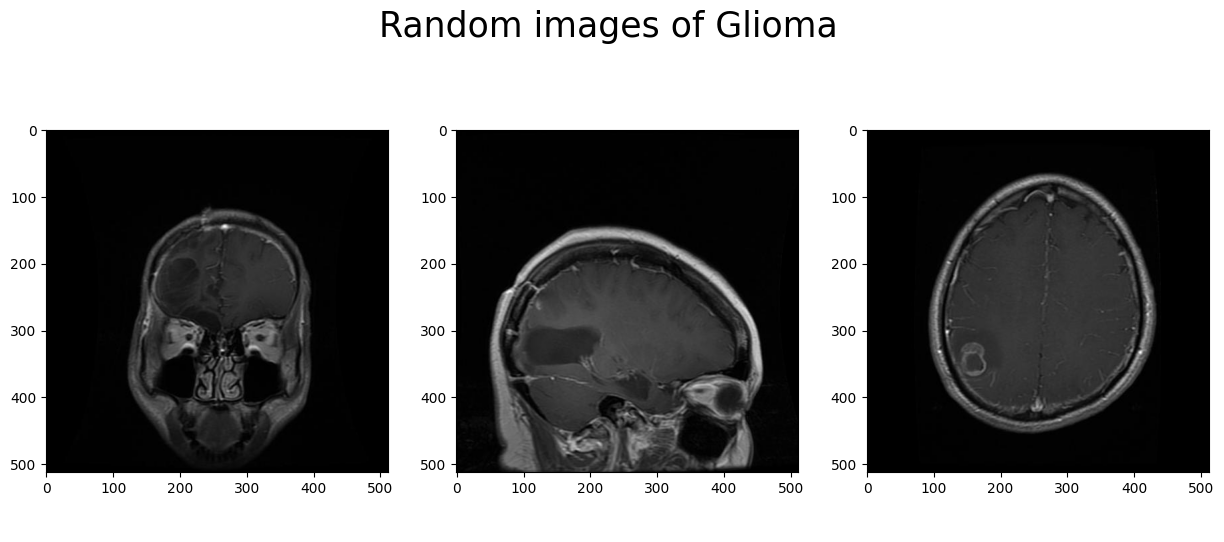

In [7]:
plt.figure(figsize=(15,6))
plt.axis('off')
n=0
for i in range(3):
  n +=1
  random_image=random.choice(train_glioma)
  img=load_img(random_image)
  plt.suptitle('Random images of Glioma', fontsize=25)
  plt.subplot(1,3,n)
  plt.imshow(img)

plt.show()

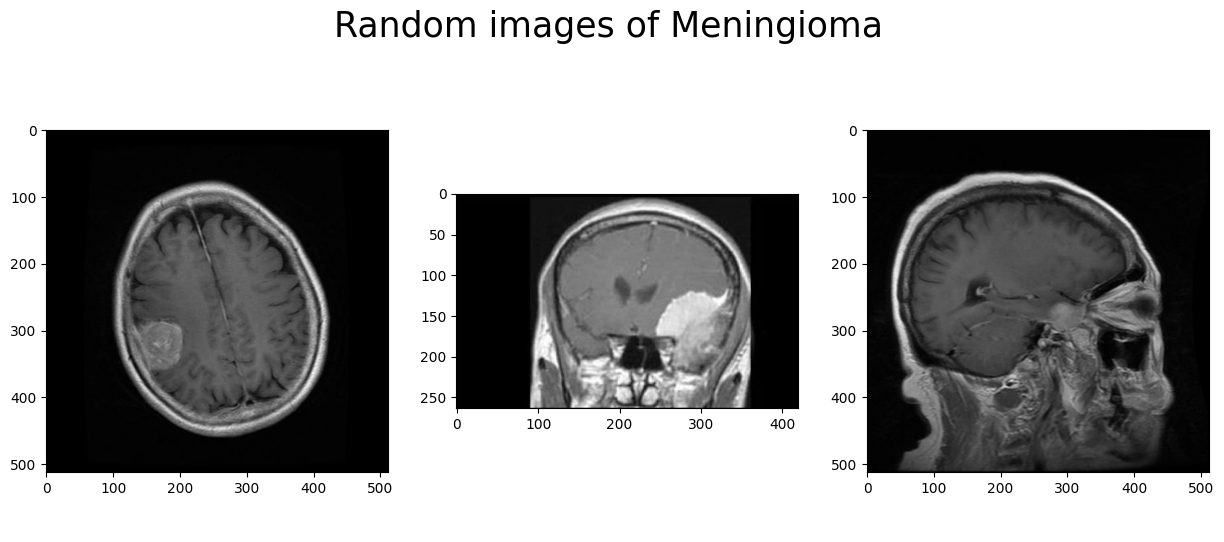

In [8]:
plt.figure(figsize=(15,6))
plt.axis('off')
n=0

for i in range(3):
  n += 1
  random_image = random.choice(train_meningioma)
  img = load_img(random_image)
  plt.suptitle('Random images of Meningioma', fontsize=25)
  plt.subplot(1,3,n)
  plt.imshow(img)

In [9]:
train_glioma_df=pd.DataFrame({'image':train_glioma, 'label':'glioma'})
train_meningioma_df=pd.DataFrame({'image':train_meningioma, 'label':'meningioma'})
train_notumor_df=pd.DataFrame({'image':train_notumor, 'label':'notumor'})
train_pituitary_df=pd.DataFrame({'image':train_pituitary, 'label':'pituitary'})

train_df=pd.concat([train_glioma_df, train_meningioma_df, train_notumor_df, train_pituitary_df], axis=0).reset_index(drop=True)
train_df[:10]

image   label
0  /root/.cache/kagglehub/datasets/masoudnickparv...  glioma
1  /root/.cache/kagglehub/datasets/masoudnickparv...  glioma
2  /root/.cache/kagglehub/datasets/masoudnickparv...  glioma
3  /root/.cache/kagglehub/datasets/masoudnickparv...  glioma
4  /root/.cache/kagglehub/datasets/masoudnickparv...  glioma
5  /root/.cache/kagglehub/datasets/masoudnickparv...  glioma
6  /root/.cache/kagglehub/datasets/masoudnickparv...  glioma
7  /root/.cache/kagglehub/datasets/masoudnickparv...  glioma
8  /root/.cache/kagglehub/datasets/masoudnickparv...  glioma
9  /root/.cache/kagglehub/datasets/masoudnickparv...  glioma

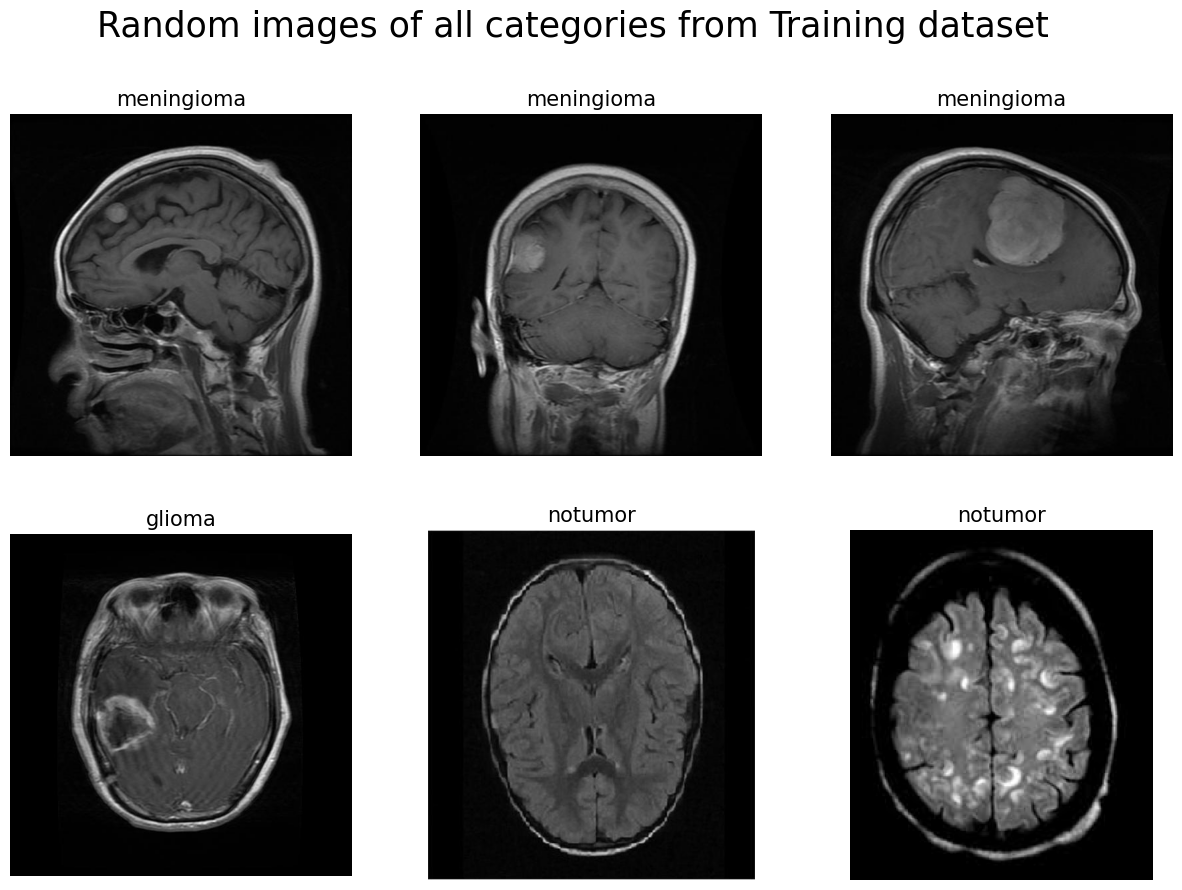

In [10]:
plt.figure(figsize=(15,10))
plt.axis('off')
n=0

for i in range(6):
  n += 1
  random_row = train_df.sample(1)
  random_image= random_row.image.values[0]
  label= random_row.label.values[0]
  img = load_img(random_image)

  plt.suptitle('Random images of all categories from Training dataset', fontsize=25)
  plt.subplot(2, 3, n)
  plt.imshow(img)
  plt.title(label, fontsize=15)  # Display the label as title
  plt.axis('off')  # Hide axes

plt.show()

In [11]:
# Path to the testing
base_path = os.path.join(masoudnickparvar_brain_tumor_mri_dataset_path, "Testing")

# Supported image file extensions
image_extensions = (".png", ".jpg", ".jpeg")

# Dictionary to store image paths for each folder (category)
image_lists = {}

# List of folder names to process
folder_names = ["glioma", "meningioma", "notumor", "pituitary"]

# Iterate through the specified folders
for folder_name in folder_names:
    folder_path = os.path.join(base_path, folder_name)

    # Check if it's a directory
    if os.path.isdir(folder_path):
        # Initialize a list for this folder
        image_lists[folder_name] = []

        # Iterate through files in the folder
        for file_name in os.listdir(folder_path):
            if file_name.endswith(image_extensions):
                full_path = os.path.join(folder_path, file_name)
                image_lists[folder_name].append(full_path)
                print(full_path)

# Summary: Print the number of images in each folder
for category, images in image_lists.items():
    print(f"Category: {category}, Number of Images: {len(images)}")

/root/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1/Testing/glioma/Te-gl_0067.jpg
/root/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1/Testing/glioma/Te-gl_0084.jpg
/root/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1/Testing/glioma/Te-gl_0111.jpg
/root/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1/Testing/glioma/Te-gl_0217.jpg
/root/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1/Testing/glioma/Te-gl_0136.jpg
/root/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1/Testing/glioma/Te-gl_0087.jpg
/root/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1/Testing/glioma/Te-gl_0011.jpg
/root/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1/Testing/glioma/Te-gl_0034.jpg
/root/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1/Test

In [12]:
test_glioma = image_lists['glioma']
test_meningioma = image_lists['meningioma']
test_notumor = image_lists['notumor']
test_pituitary = image_lists['pituitary']

In [13]:
test_glioma_df=pd.DataFrame({'image': test_glioma, 'label': 'glioma'})
test_meningioma_df=pd.DataFrame({'image': test_meningioma, 'label': 'meningioma'})
test_notumor_df=pd.DataFrame({'image': test_notumor, 'label': 'notumor'})
test_pituitary_df=pd.DataFrame({'image': test_pituitary, 'label': 'pituitary'})

In [14]:
test_df=pd.concat([test_glioma_df, test_meningioma_df, test_notumor_df, test_pituitary_df], axis=0).reset_index(drop=True)
test_df[-10:]

image      label
1301  /root/.cache/kagglehub/datasets/masoudnickparv...  pituitary
1302  /root/.cache/kagglehub/datasets/masoudnickparv...  pituitary
1303  /root/.cache/kagglehub/datasets/masoudnickparv...  pituitary
1304  /root/.cache/kagglehub/datasets/masoudnickparv...  pituitary
1305  /root/.cache/kagglehub/datasets/masoudnickparv...  pituitary
1306  /root/.cache/kagglehub/datasets/masoudnickparv...  pituitary
1307  /root/.cache/kagglehub/datasets/masoudnickparv...  pituitary
1308  /root/.cache/kagglehub/datasets/masoudnickparv...  pituitary
1309  /root/.cache/kagglehub/datasets/masoudnickparv...  pituitary
1310  /root/.cache/kagglehub/datasets/masoudnickparv...  pituitary

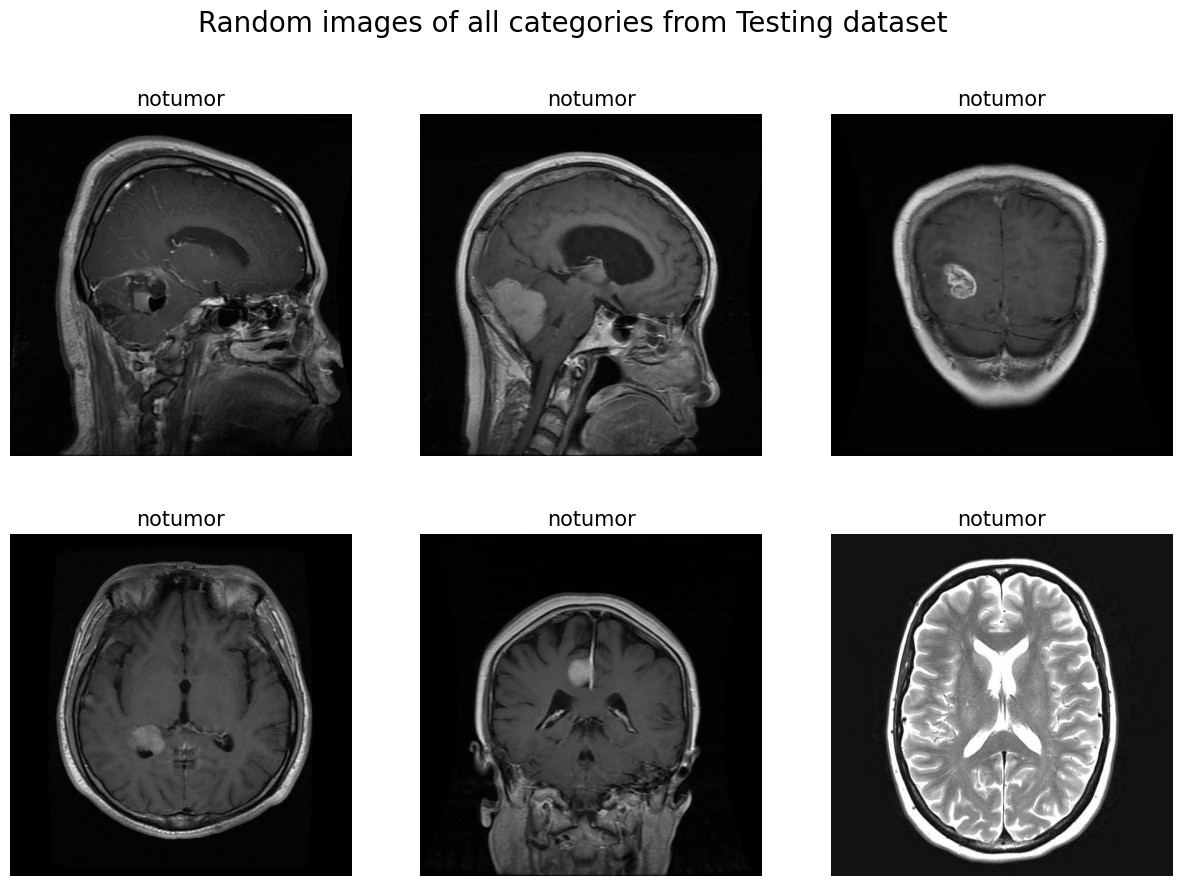

In [15]:
plt.figure(figsize=(15,10))
plt.axis('off')
n=0

for i in range(6):
  n +=1
  random_row=test_df.sample(1)
  random_image=random_row.image.values[0]
  random_label=random_row.label.values[0]
  img=load_img(random_image)

  plt.suptitle('Random images of all categories from Testing dataset', fontsize=20)
  plt.subplot(2, 3, n)
  plt.imshow(img)
  plt.title(label, fontsize=15)  # Display the label as title
  plt.axis('off')  # Hide axes

plt.show()

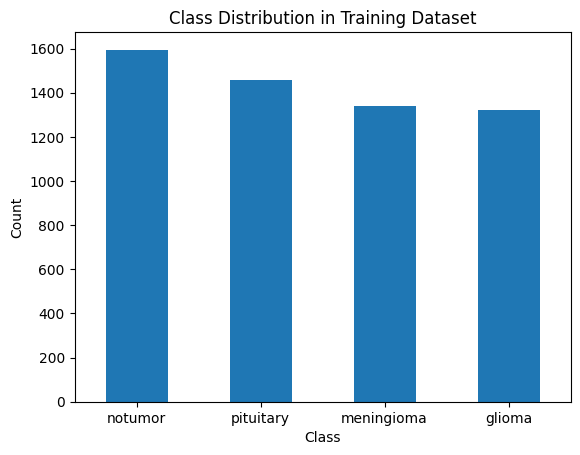

In [16]:
train_df.label.value_counts().plot(kind='bar')
plt.title('Class Distribution in Training Dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

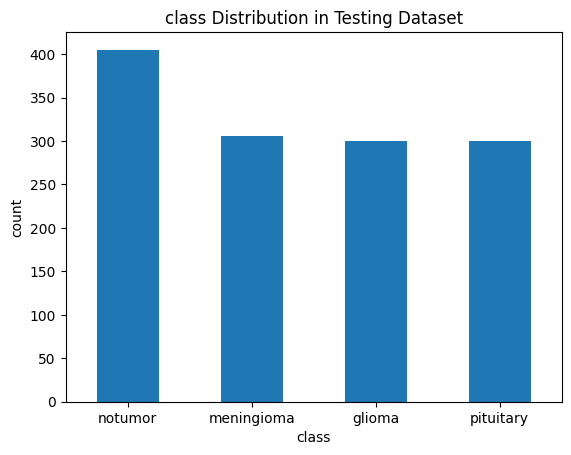

In [17]:
test_df.label.value_counts().plot(kind='bar')
plt.title('class Distribution in Testing Dataset')
plt.xlabel('class')
plt.ylabel('count')
plt.xticks(rotation=0)
plt.show()

# Data Preprocessing

In [18]:
image_size=(150,150)
batch_size= 32

In [19]:
# Data augumentation and preprocessing
train_datagen= ImageDataGenerator(rescale=1./255,
                                  validation_split=0.15,
                                  rotation_range=10,
                                  brightness_range=(0.85, 1.15),
                                  width_shift_range=0.002,
                                  height_shift_range=0.002,
                                  shear_range=12.5,
                                  zoom_range=0,
                                  horizontal_flip=True,
                                  vertical_flip=False,
                                  fill_mode='nearest')
val_datagen=ImageDataGenerator(rescale=1./255, validation_split=0.15)


# creating training data generator
train_generator=train_datagen.flow_from_dataframe(dataframe=train_df,
                                                  x_col='image',
                                                  y_col='label',
                                                  target_size=image_size,
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  subset='training',
                                                  seed=0)

# creating validation data generator
val_generator=val_datagen.flow_from_dataframe(dataframe=train_df,
                                                  x_col='image',
                                                  y_col='label',
                                                  target_size=image_size,
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  subset='validation',
                                                  seed=0)

# Testing dataset: No augumentation, just rescaling
test_datagen=ImageDataGenerator(rescale=1./255)

# creating validation data generator
test_generator=test_datagen.flow_from_dataframe(dataframe=test_df,
                                                  x_col='image',
                                                  y_col='label',
                                                  target_size=image_size,
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  shuffle=False,
                                                  seed=0)


Found 4856 validated image filenames belonging to 4 classes.
Found 856 validated image filenames belonging to 4 classes.
Found 1311 validated image filenames belonging to 4 classes.


Found 5712 validated image filenames belonging to 4 classes.
Found 4856 validated image filenames belonging to 4 classes.


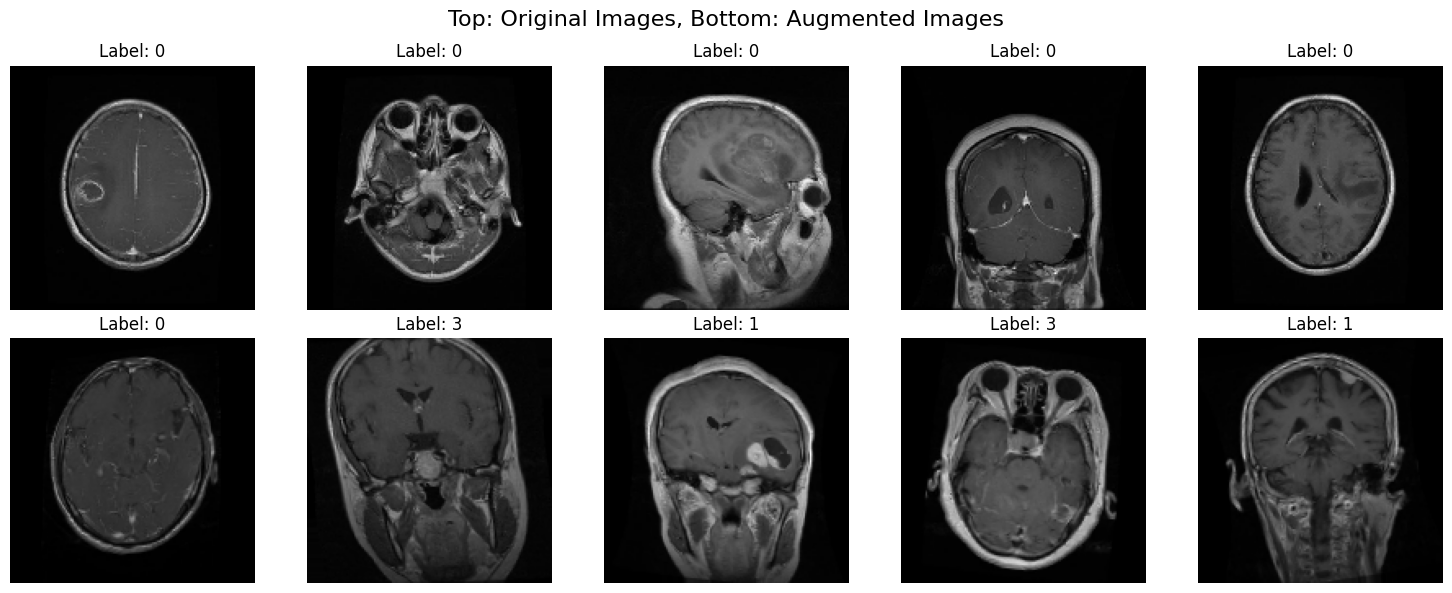

In [20]:

# Load one batch of original images (without augmentation)
original_generator = ImageDataGenerator(rescale=1./255).flow_from_dataframe(
    dataframe=train_df,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=5,  # Small batch for visualization
    class_mode='categorical',
    shuffle=False  # To ensure consistent image order
)

# Load one batch of augmented images
augmented_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=5,
    class_mode='categorical',
    subset='training',
    seed=0
)

# Get a batch of original images and augmented images
original_images, original_labels = next(original_generator)
augmented_images, augmented_labels = next(augmented_generator)

# Visualize the images
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
fig.suptitle("Top: Original Images, Bottom: Augmented Images", fontsize=16)

# Display original images
for i in range(5):
    axes[0, i].imshow(original_images[i])
    axes[0, i].axis('off')
    axes[0, i].set_title(f"Label: {np.argmax(original_labels[i])}")

# Display augmented images
for i in range(5):
    axes[1, i].imshow(augmented_images[i])
    axes[1, i].axis('off')
    axes[1, i].set_title(f"Label: {np.argmax(augmented_labels[i])}")

plt.tight_layout()
plt.show()


In [21]:
# Training setup
image_shape=(image_size[0], image_size[1], 3)
print( 'image shape:', image_shape)
print('batch size:', batch_size)
print(f'number of Train batches: {len(train_generator)}')
print(f'number of Validation batches: {len(val_generator)}')
print(f'number of Test batches: {len(test_generator)}')


image shape: (150, 150, 3)
batch size: 32
number of Train batches: 152
number of Validation batches: 27
number of Test batches: 41


In [22]:
classes_map= train_generator.class_indices

num_classes=len(classes_map)
print('number of classes:', num_classes)
classes_map

number of classes: 4


{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

In [23]:
# function to plot history

def plot_curves(history):
  loss=history.history['loss']
  val_loss=history.history['val_loss']

  accuracy=history.history['accuracy']
  val_accuracy=history.history['val_accuracy']

  epochs= range(len(history.history['loss']))

  plt.figure(figsize=(15,5))
  plt.style.use('ggplot')

  plt.subplot(1,2,1)
  plt.plot(epochs, loss, 'bo-', label='Training Loss')
  plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
  plt.title('Training and Validation Loss')
  plt.xlabel('Epochs')
  plt.legend()

  plt.subplot(1,2,2)
  plt.plot(epochs, accuracy, 'bo-', label='Training Accuracy')
  plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
  plt.title('Training and Validation Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

  plt.style.use('default')


In [41]:
# create confusion matrix

def CM( model, test_generator, categories):
  from sklearn.metrics import confusion_matrix

  predictions=model.predict(test_generator)
  predicted_categories=np.argmax(predictions, axis=1)
  true_categories=test_generator.classes

  confusion_matrix_array=confusion_matrix(true_categories, predicted_categories)
  print(f'Confusion matrix for {model}:')
  print(classification_report(true_categories, predicted_categories, target_names=categories))

  return confusion_matrix_array




In [25]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def evaluation_results(y_true, y_pred):
  model_accuracy=accuracy_score(y_true, y_pred)
  model_precision, model_recall, model_f1, _= precision_recall_fscore_support(y_true, y_pred, average='weighted')
  model_results={'accuracy': model_accuracy,
                 'precision': model_precision,
                 'recall': model_recall,
                 'f1': model_f1}

  return model_results

In [33]:

# define a ModelCheckpoint callback to save the best model during training based on validation accuracy

from tensorflow.keras.callbacks import ModelCheckpoint

def creat_checkpoint_callback(checkpoint_path):
  checkpoint_callback=ModelCheckpoint(filepath=checkpoint_path,
                                      monitor='val_accuracy',
                                      mode='max',
                                      save_best_only=True,
                                      verbose=1)
  return checkpoint_callback

# CNN model

In [27]:
inputs= tf.keras.Input(shape=image_shape)
x=tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu')(inputs)
x=tf.keras.layers.MaxPooling2D(pool_size=(2,2))(x)

x=tf.keras.layers.Conv2D(64, (3,3), activation='relu')(x)
x=tf.keras.layers.MaxPooling2D(pool_size=(2,2))(x)

x=tf.keras.layers.Conv2D(128, (3,3), activation='relu')(x)
x=tf.keras.layers.MaxPooling2D(pool_size=(2,2))(x)

x=tf.keras.layers.Conv2D(128,(3,3), activation='relu')(x)
x=tf.keras.layers.MaxPooling2D(pool_size=(2,2))(x)

x=tf.keras.layers.Flatten()(x)
x=tf.keras.layers.Dense(512, activation='relu')(x)
x=tf.keras.layers.Dropout(0.5)(x)
outputs=tf.keras.layers.Dense(num_classes, activation='softmax')(x)

model_cnn=tf.keras.Model(inputs=inputs, outputs=outputs)

model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_cnn.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,454,660 (13.18 MB)

 Trainable params: 3,454,660 (13.18 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
checkpoint_path='/content/Mydrive/MyDrive/TensorFlow_data/best_model_cnn.keras'

# create callback
checkpoint_callback=creat_checkpoint_callback(checkpoint_path)

model_cnn_history= model_cnn.fit(train_generator,
                                 epochs=10,
                                 validation_data=val_generator,
                                 callbacks=[checkpoint_callback]
                                 )

Saving TensorBoard log files to: logs/cnn/20241226-163506
Epoch 1/10
151/152 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step - accuracy: 0.5870 - loss: 0.9397
Epoch 1: val_accuracy improved from -inf to 0.26051, saving model to /content/Mydrive/MyDrive/TensorFlow_data/best_model_cnn.keras
152/152 ━━━━━━━━━━━━━━━━━━━━ 56s 305ms/step - accuracy: 0.5888 - loss: 0.9367 - val_accuracy: 0.2605 - val_loss: 1.5388
Epoch 2/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step - accuracy: 0.8298 - loss: 0.4872
Epoch 2: val_accuracy improved from 0.26051 to 0.30023, saving model to /content/Mydrive/MyDrive/TensorFlow_data/best_model_cnn.keras
152/152 ━━━━━━━━━━━━━━━━━━━━ 41s 261ms/step - accuracy: 0.8298 - loss: 0.4870 - val_accuracy: 0.3002 - val_loss: 1.4878
Epoch 3/10
151/152 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - accuracy: 0.8500 - loss: 0.4164
Epoch 3: val_accuracy improved from 0.30023 to 0.46262, saving model to /content/Mydrive/MyDrive/TensorFlow_data/best_model_cnn.keras
152/152 ━━━━━━━━━━━━━━━━━━━━ 38s 242ms/

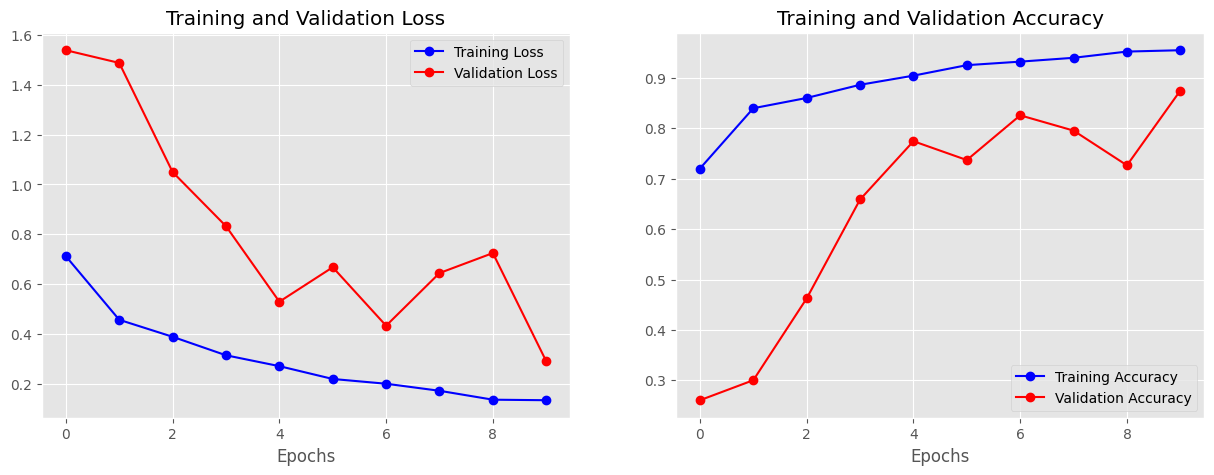

In [36]:
# plot history
plot_curves(model_cnn_history)

In [38]:
# load the best Cnn model (determined by val accuracy)

from tensorflow.keras.models import load_model
model_cnn=load_model('/content/Mydrive/MyDrive/TensorFlow_data/best_model_cnn.keras')

In [39]:
  # prediction of test data based on CNN model
  pred_cnn=model_cnn.predict(test_generator)
  pred_cnn_categories=np.argmax(pred_cnn, axis=1)
  true_categories=test_generator.classes
  classes=list(test_generator.class_indices.keys())


model_cnn_results=evaluation_results(true_categories, pred_cnn_categories)
model_cnn_results



41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step


{'accuracy': 0.9153318077803204,
 'precision': 0.9179116777788953,
 'recall': 0.9153318077803204,
 'f1': 0.9143926050676868}

41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step
Confusion matrix for <Functional name=functional, built=True>:
              precision    recall  f1-score   support

      glioma       0.97      0.82      0.89       300
  meningioma       0.84      0.85      0.84       306
     notumor       0.90      1.00      0.95       405
   pituitary       0.97      0.97      0.97       300

    accuracy                           0.92      1311
   macro avg       0.92      0.91      0.91      1311
weighted avg       0.92      0.92      0.91      1311



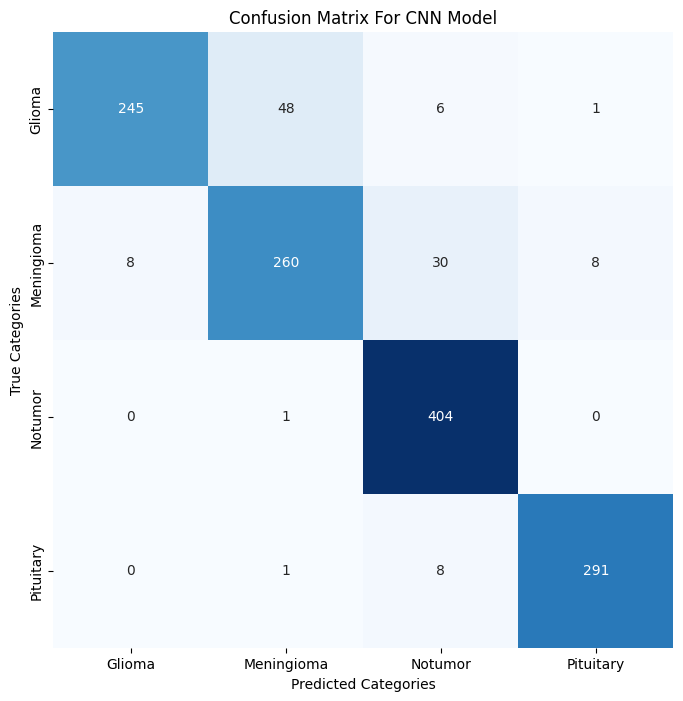

In [42]:
# confusion matrix based on CNN model
confusion_matrix_cnn=CM(model_cnn, test_generator, classes)

plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix_cnn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix For CNN Model')
plt.xlabel('Predicted Categories')
plt.ylabel('True Categories')
plt.xticks(ticks=np.arange(4) +0.5, labels=[name.title() for name in classes], ha='center')
plt.yticks(ticks=np.arange(4) +0.5, labels=[name.title() for name in classes], va='center')
plt.show()

# VGG16 model

In [44]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D

base_model_vgg=VGG16(weights='imagenet', include_top=False, input_shape=(150,150, 3))

for layer in base_model_vgg.layers[:-10]:
  layer.trainable=False

for layer in base_model_vgg.layers[-10:]:
  layer.trainable=True

# add custom classification head

x= base_model_vgg.output
x=GlobalAveragePooling2D()(x)
x=Dense(512, activation='relu')(x)
x=Dropout(0.5)(x)
output= Dense(num_classes, activation='softmax')(x)

model_vgg=tf.keras.Model(inputs=base_model_vgg.input, outputs=output)

model_vgg.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                  metrics=['accuracy'])

model_vgg.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         262,6

 Total params: 14,979,396 (57.14 MB)

 Trainable params: 13,833,988 (52.77 MB)

 Non-trainable params: 1,145,408 (4.37 MB)

In [46]:
checkpoint_path='/content/Mydrive/MyDrive/TensorFlow_data/best_model_vgg.keras'

# create callbacks
checkpoint_callback=creat_checkpoint_callback(checkpoint_path)

model_vgg_history=model_vgg.fit(train_generator,
                                epochs=10,
                                validation_data=val_generator,
                                callbacks=[checkpoint_callback])

Saving TensorBoard log files to: logs/vgg/20241226-164529
Epoch 1/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step - accuracy: 0.6590 - loss: 0.8163
Epoch 1: val_accuracy improved from -inf to 0.66005, saving model to /content/Mydrive/MyDrive/TensorFlow_data/best_model_vgg.keras
152/152 ━━━━━━━━━━━━━━━━━━━━ 95s 491ms/step - accuracy: 0.6598 - loss: 0.8146 - val_accuracy: 0.6600 - val_loss: 0.7874
Epoch 2/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - accuracy: 0.9132 - loss: 0.2483
Epoch 2: val_accuracy improved from 0.66005 to 0.75467, saving model to /content/Mydrive/MyDrive/TensorFlow_data/best_model_vgg.keras
152/152 ━━━━━━━━━━━━━━━━━━━━ 58s 352ms/step - accuracy: 0.9132 - loss: 0.2483 - val_accuracy: 0.7547 - val_loss: 0.6716
Epoch 3/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step - accuracy: 0.9416 - loss: 0.1646
Epoch 3: val_accuracy improved from 0.75467 to 0.80257, saving model to /content/Mydrive/MyDrive/TensorFlow_data/best_model_vgg.keras
152/152 ━━━━━━━━━━━━━━━━━━━━ 73s 464ms/

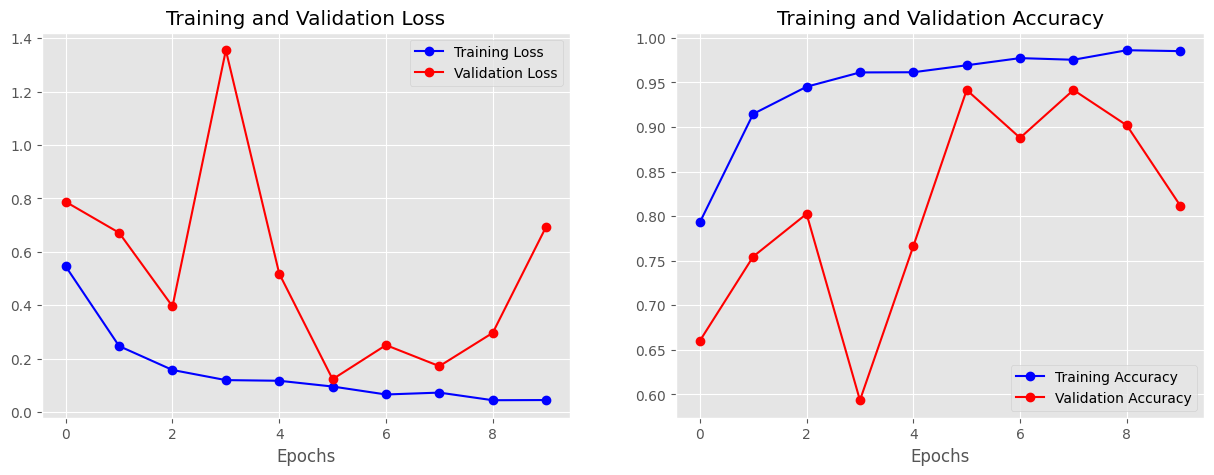

In [48]:
plot_curves(model_vgg_history)

In [49]:
# load the best model
model_vgg=load_model('/content/Mydrive/MyDrive/TensorFlow_data/best_model_vgg.keras')

In [50]:
# predictions based on model_vgg
pred_vgg=model_vgg.predict(test_generator)
pred_vgg_categories=np.argmax(pred_vgg, axis=1)
true_categories=test_generator.classes

model_vgg_results=evaluation_results(true_categories, pred_vgg_categories)
model_vgg_results

41/41 ━━━━━━━━━━━━━━━━━━━━ 13s 309ms/step


{'accuracy': 0.9740655987795576,
 'precision': 0.9742201191916048,
 'recall': 0.9740655987795576,
 'f1': 0.9739766084833075}

41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step
Confusion matrix for <Functional name=functional_1, built=True>:
              precision    recall  f1-score   support

      glioma       0.98      0.94      0.96       300
  meningioma       0.95      0.96      0.95       306
     notumor       0.99      1.00      0.99       405
   pituitary       0.98      1.00      0.99       300

    accuracy                           0.97      1311
   macro avg       0.97      0.97      0.97      1311
weighted avg       0.97      0.97      0.97      1311



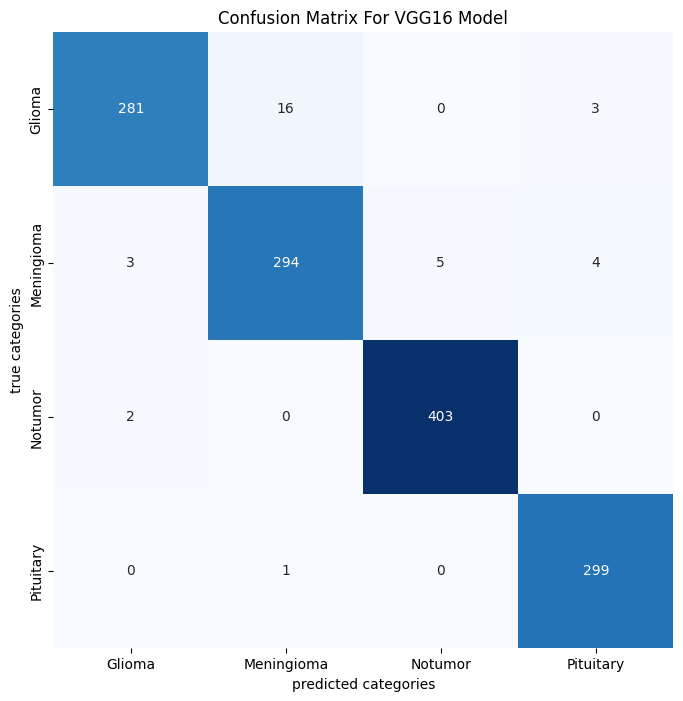

In [52]:
# confusion matrix for vgg model
confusion_matrix_vgg=CM(model_vgg, test_generator, classes)

plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix_vgg, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix For VGG16 Model')
plt.xlabel('predicted categories')
plt.ylabel('true categories')
plt.xticks(ticks=np.arange(4) +0.5, labels=[name.title() for name in classes], ha='center')
plt.yticks(ticks=np.arange(4) +0.5, labels=[name.title() for name in classes], va='center')

plt.show()


# ResNet101 model

In [54]:
from tensorflow.keras.applications import ResNet101


base_model_resnet=ResNet101(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

for layer in base_model_resnet.layers[:-10]:
  layer.trainable=False

for layer in base_model_resnet.layers[-10:]:
  layer.trainable=True

# add custom classification head
x=base_model_resnet.output
x=GlobalAveragePooling2D()(x)

x=Dense(512, activation='relu')(x)
x=Dropout(0.5)(x)
output=Dense(num_classes, activation='softmax')(x)

model_resnet=tf.keras.Model(inputs=base_model_resnet.input, outputs=output)

model_resnet.compile(loss='categorical_crossentropy',
                     optimizer= tf.keras.optimizers.Adam(learning_rate=1e-4),
                     metrics=['accuracy'])

model_resnet.summary()

171446536/171446536 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 150, 150, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 156, 156, 3)    │              0 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 75, 75, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 75, 75, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 75, 75, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 77, 77, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 38, 38, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 38, 38, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 38, 38, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 38, 38, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 38, 38, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 38, 38, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 38, 38, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 38, 38, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 38, 38, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 43,709,316 (166.74 MB)

 Trainable params: 5,516,804 (21.04 MB)

 Non-trainable params: 38,192,512 (145.69 MB)

In [55]:
checkpoint_path='/content/Mydrive/MyDrive/TensorFlow_data/best_model_resnet.keras'
checkpoint_callback=creat_checkpoint_callback(checkpoint_path)


model_resnet_history= model_resnet.fit(train_generator,
                                       epochs=10,
                                       validation_data=val_generator,
                                       callbacks=[checkpoint_callback])

Saving TensorBoard log files to: logs/resnet/20241226-165934
Epoch 1/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - accuracy: 0.6370 - loss: 0.9018
Epoch 1: val_accuracy improved from -inf to 0.00000, saving model to /content/Mydrive/MyDrive/TensorFlow_data/best_model_resnet.keras
152/152 ━━━━━━━━━━━━━━━━━━━━ 86s 411ms/step - accuracy: 0.6376 - loss: 0.9006 - val_accuracy: 0.0000e+00 - val_loss: 4.1088
Epoch 2/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step - accuracy: 0.7912 - loss: 0.5484
Epoch 2: val_accuracy did not improve from 0.00000
152/152 ━━━━━━━━━━━━━━━━━━━━ 43s 274ms/step - accuracy: 0.7913 - loss: 0.5482 - val_accuracy: 0.0000e+00 - val_loss: 4.3936
Epoch 3/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - accuracy: 0.8236 - loss: 0.4782
Epoch 3: val_accuracy improved from 0.00000 to 0.01168, saving model to /content/Mydrive/MyDrive/TensorFlow_data/best_model_resnet.keras
152/152 ━━━━━━━━━━━━━━━━━━━━ 45s 286ms/step - accuracy: 0.8236 - loss: 0.4782 - val_accuracy: 0.0117 - va

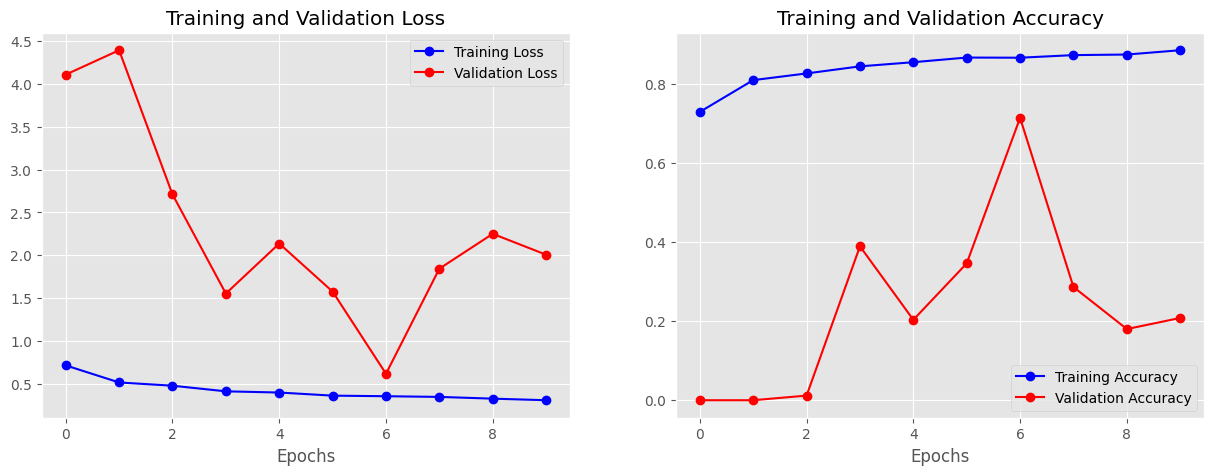

In [56]:
plot_curves(model_resnet_history)

In [57]:
# load the best resent model
model_resnet=load_model('/content/Mydrive/MyDrive/TensorFlow_data/best_model_resnet.keras')

In [58]:
# prediction for test data based on ResNet101 model

pred_resnet=model_resnet.predict(test_generator)
pred_resnet_categories=np.argmax(pred_resnet, axis=1)
true_categories=test_generator.classes

model_resnet_results=evaluation_results(true_categories, pred_resnet_categories)
model_resnet_results

41/41 ━━━━━━━━━━━━━━━━━━━━ 17s 290ms/step


{'accuracy': 0.7955758962623951,
 'precision': 0.7980970301692865,
 'recall': 0.7955758962623951,
 'f1': 0.7905517311761501}

41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step
Confusion matrix for <Functional name=functional_2, built=True>:
              precision    recall  f1-score   support

      glioma       0.83      0.63      0.72       300
  meningioma       0.63      0.63      0.63       306
     notumor       0.81      1.00      0.89       405
   pituitary       0.92      0.86      0.89       300

    accuracy                           0.80      1311
   macro avg       0.80      0.78      0.78      1311
weighted avg       0.80      0.80      0.79      1311



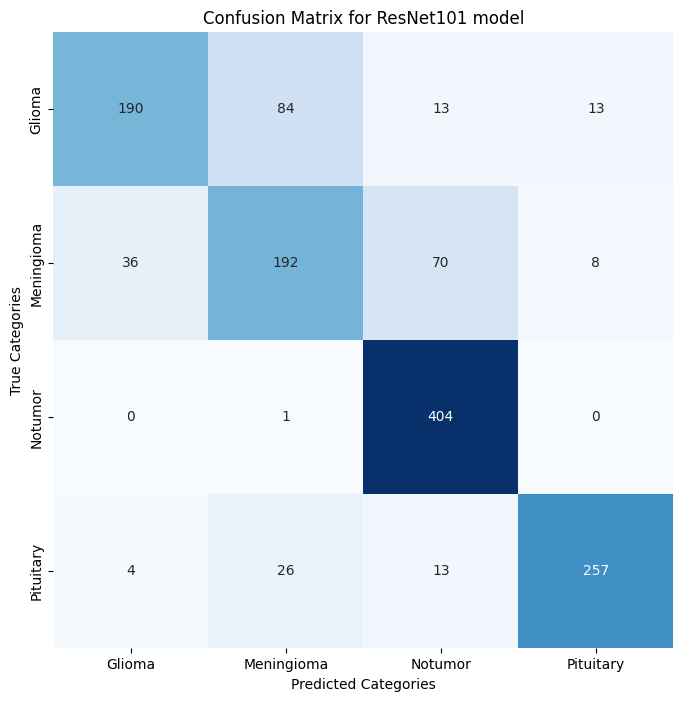

In [59]:
# confusion matrix based on Resnet model

confusion_matrix_resnet=CM(model_resnet, test_generator, classes)

plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix_resnet, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for ResNet101 model')
plt.xlabel('Predicted Categories')
plt.ylabel('True Categories')
plt.xticks(ticks=np.arange(4)+ 0.5, labels=[name.title() for name in classes], ha='center')
plt.yticks(ticks=np.arange(4)+ 0.5, labels=[name.title() for name in classes], va='center')

plt.show()

# Comparing the models

In [64]:
all_model_results= pd.DataFrame({'CNN model': model_cnn_results,
                                 'VGG16 model': model_vgg_results,
                                 'ResNet101 model': model_resnet_results})
all_model_results=all_model_results.transpose()
all_model_results


accuracy  precision    recall        f1
CNN model        0.915332   0.917912  0.915332  0.914393
VGG16 model      0.974066   0.974220  0.974066  0.973977
ResNet101 model  0.795576   0.798097  0.795576  0.790552

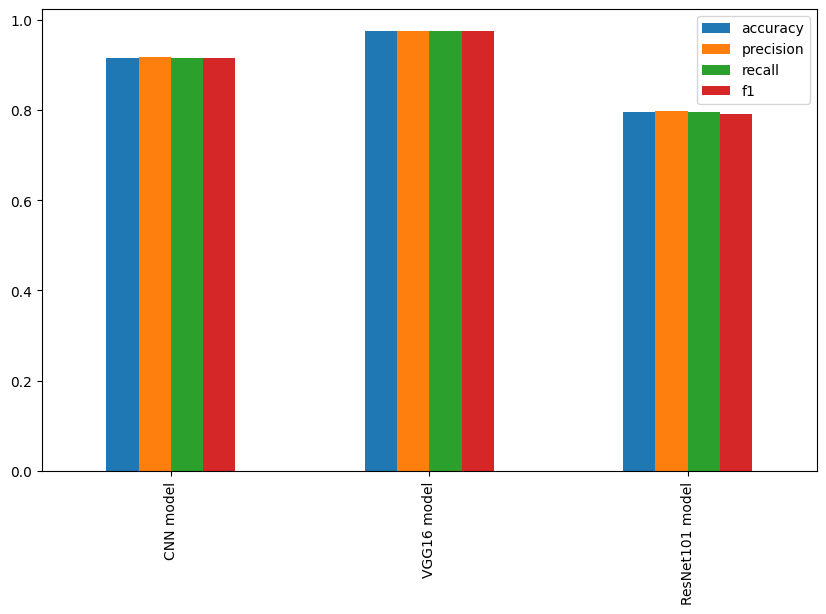

In [65]:
all_model_results.plot(kind='bar', figsize=(10,6)).legend(bbox_to_anchor=(1, 1))

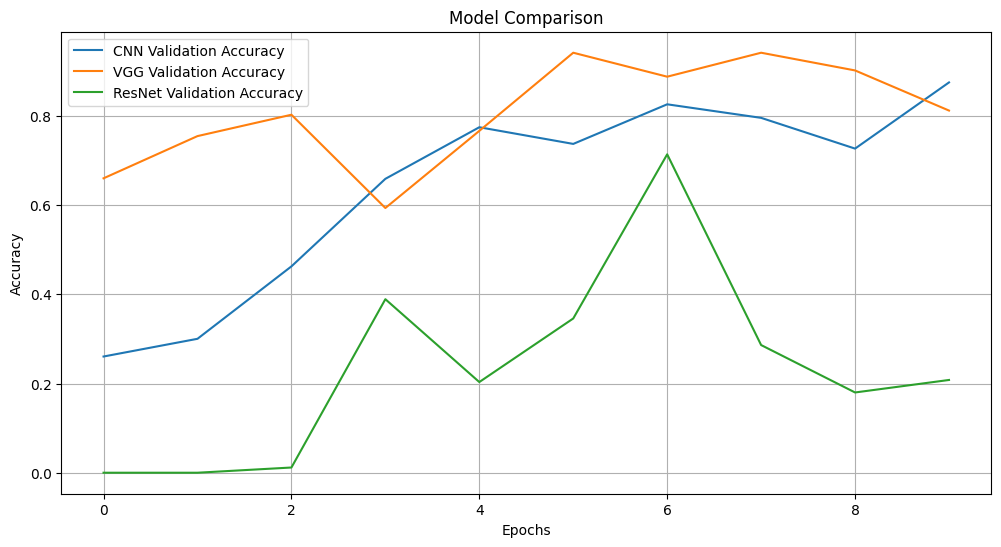

In [93]:
import matplotlib.pyplot as plt

# Plotting training and validation accuracy for each model
plt.figure(figsize=(12, 6))

# CNN
#plt.plot(model_cnn_history.history['accuracy'], label='CNN Training Accuracy')
plt.plot(model_cnn_history.history['val_accuracy'], label='CNN Validation Accuracy')

# VGG
#plt.plot(model_vgg_history.history['accuracy'], label='VGG Training Accuracy')
plt.plot(model_vgg_history.history['val_accuracy'], label='VGG Validation Accuracy')

# ResNet
#plt.plot(model_resnet_history.history['accuracy'], label='ResNet Training Accuracy')
plt.plot(model_resnet_history.history['val_accuracy'], label='ResNet Validation Accuracy')

plt.title('Model Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


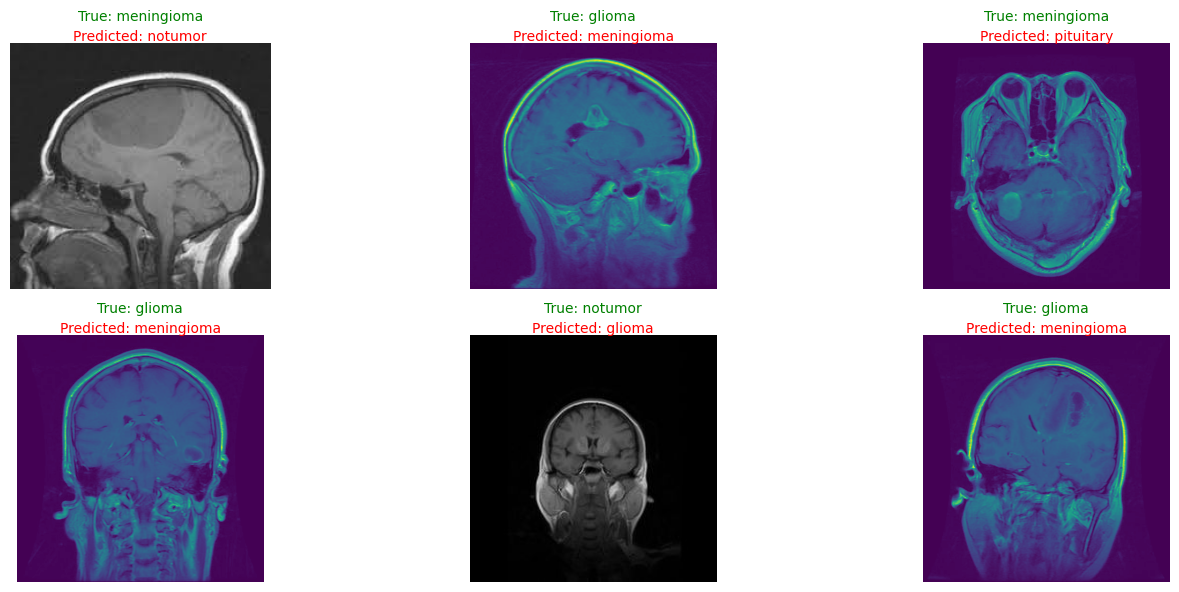

In [102]:
# display some misclassified images

misclassified_idx = np.where(pred_vgg_categories != true_categories)[0]
n_images = 6  # number of images to display
random_indices = np.random.choice(misclassified_idx, size=min(len(misclassified_idx), n_images), replace=False)

plt.figure(figsize=(15, 6))
for i, idx in enumerate(random_indices):
    # Load the image
    img = test_generator.filepaths[idx]
    img_data = plt.imread(img)

    # Get true and predicted labels
    true_label = classes[true_categories[idx]]
    predicted_label = classes[pred_vgg_categories[idx]]

    # Plot the image
    plt.subplot(2, 3, i + 1)
    plt.imshow(img_data)
    plt.axis('off')

    # Set the True label in green and Predicted label in red using plt.text
    plt.text(0.5, 1.08, f'True: {true_label}', color='green', ha='center', va='bottom', fontsize=10
             , transform=plt.gca().transAxes)
    plt.text(0.5, 1, f'Predicted: {predicted_label}', color='red', ha='center', va='bottom', fontsize=10, transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()


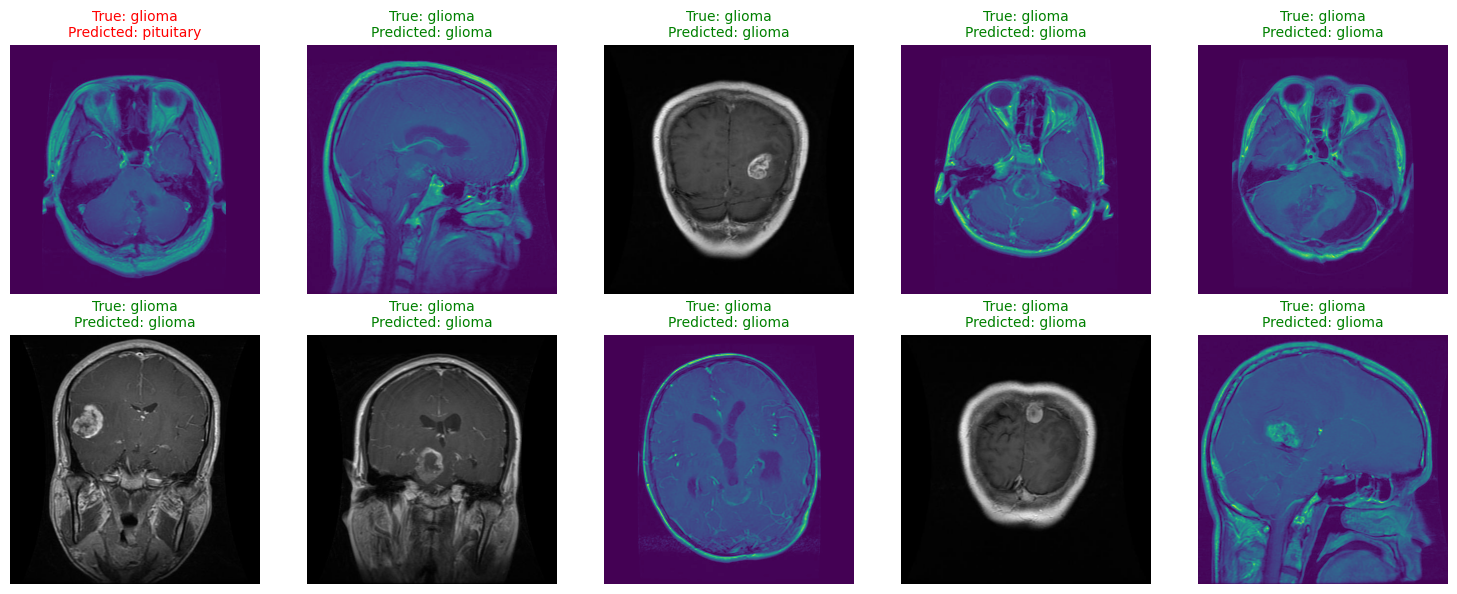

In [101]:
# display random 10 images

# Compare predictions with true classes
correct_predictions = pred_vgg_categories == true_categories

# Select 10 random indices
n_images = 10
random_indices = np.random.choice(len(test_generator), size=n_images, replace=False)

plt.figure(figsize=(15, 6))
for i, idx in enumerate(random_indices):
    # Load the image
    img = test_generator.filepaths[idx]
    img_data = plt.imread(img)

    # Get true and predicted labels
    true_label = classes[true_categories[idx]]
    predicted_label = classes[pred_vgg_categories[idx]]

    # Check if the prediction is correct
    if correct_predictions[idx]:
        title_color = 'green'  # Correct prediction (True label in green)
    else:
        title_color = 'red'  # Incorrect prediction (Predicted label in red)

    # Plot the image
    plt.subplot(2, 5, i + 1)
    plt.imshow(img_data)
    plt.axis('off')

    # Set title with the color based on the correctness of the prediction
    plt.title(f'True: {true_label}\nPredicted: {predicted_label}', color=title_color, fontsize=10)

plt.tight_layout()
plt.show()
